# Heart failure prediction 

Based on the course: https://www.youtube.com/watch?v=NWONeJKn6kc

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('dataset/archive/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
print('Shape of the data', data.shape)

Shape of the data (299, 13)


In [7]:
print('Information about data:- ')
data.info()

Information about data:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 

In [8]:
print('describing the data:- ')
data.describe()

describing the data:- 


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
print('No. of Null Values')
data.isnull().sum()

No. of Null Values


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Exporatory data analysis

Total of living cases :-  203
Total of death cases :-  96


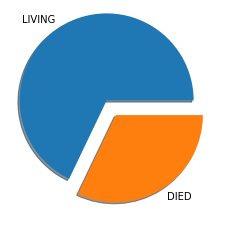

In [10]:
len_live = len(data['DEATH_EVENT'][data.DEATH_EVENT == 0])
len_death = len(data['DEATH_EVENT'][data.DEATH_EVENT == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING', 'DIED']
print('Total of living cases :- ', len_live)
print('Total of death cases :- ', len_death)

plt.pie(arr, labels=labels, explode=[0.2, 0.0], shadow=True)
plt.show()

# infering we have imbalance data

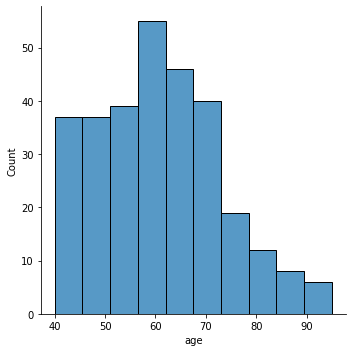

In [11]:
# seeing distribution of age

sns.displot(data['age'])
plt.show()

Total of died cases :-  85
Total of not died cases :-  167


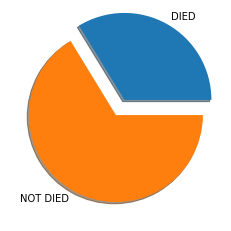

In [12]:
# selecting rows that are above age 50 and seeing died or not 
age_above_50_not_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 0]
age_above_50_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)
print('Total of died cases :- ', len_died)
print('Total of not died cases :- ', len_not_died)

arr1 = [len_died, len_not_died]
labels = ['DIED', 'NOT DIED']

plt.pie(arr1, labels=labels, explode=[0.2, 0.0], shadow=True)
plt.show()

Total of died with diabetes cases :-  40
Total of not died with diabetes cases :-  118


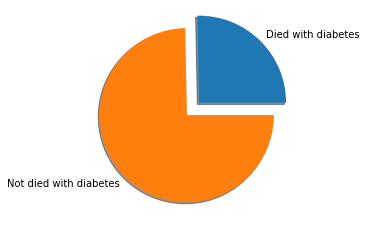

In [13]:
patient_nhave_diabetes_0 = data['DEATH_EVENT'][data.diabetes == 0][data.DEATH_EVENT == 0]
patient_have_diabetes_1 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)
print('Total of died with diabetes cases :- ', len_d_died)
print('Total of not died with diabetes cases :- ', len_d_alive)

arr2 = [len_d_died, len_d_alive]
labels = ['Died with diabetes', 'Not died with diabetes']

plt.pie(arr2, labels=labels, explode=[0.2, 0.0], shadow=True)
plt.show()

# inference:- persons who have diabetes are less frequent to die

<AxesSubplot:>

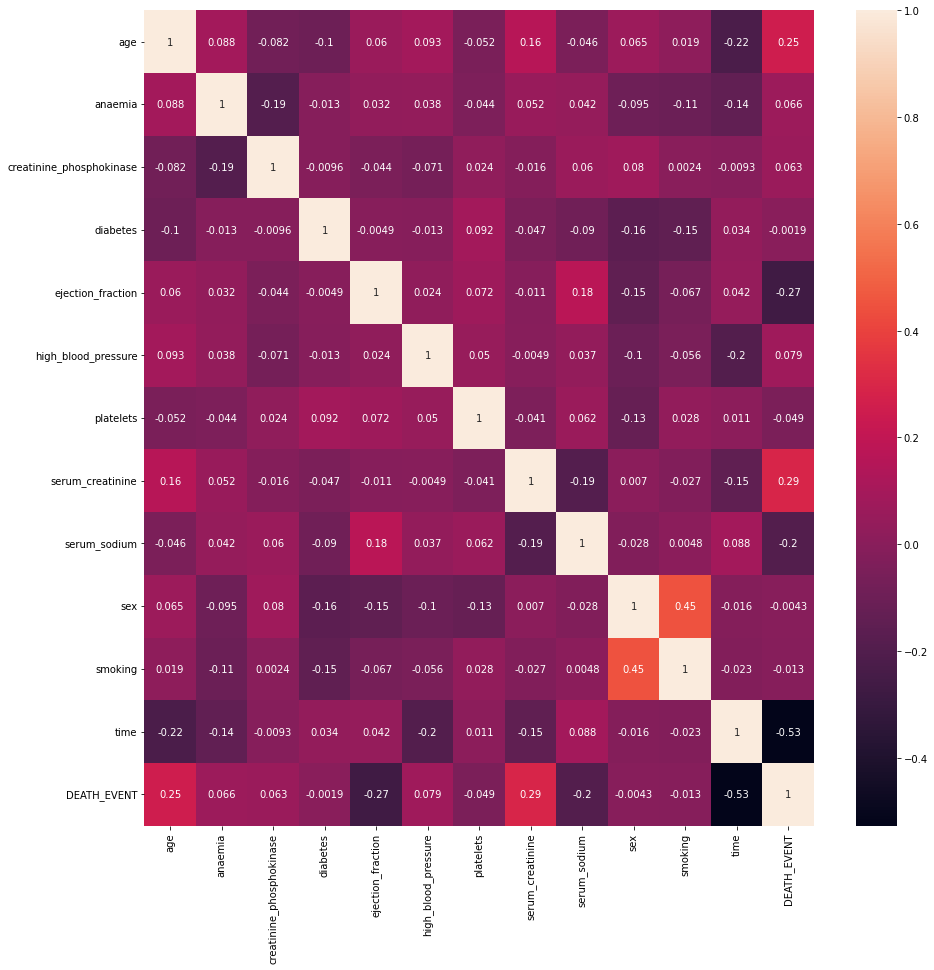

In [14]:
# checking the correlation of our variables 

corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)

In [15]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## Dataset development

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Shape of the X_train', X_train.shape)
print('Shape of the X_test', X_test.shape)
print('Shape of the y_train', y_train.shape)
print('Shape of the y_test', y_test.shape)

Shape of the X_train (209, 12)
Shape of the X_test (90, 12)
Shape of the y_train (209,)
Shape of the y_test (90,)


## Feature Engineering

Interaction terms are the product of two features.

In [17]:
def add_interactions(X):
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)
    
    for i in range(m):
        feature_i_name = features[i]
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, m):
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            
            feature_i_j_name = feature_i_name+'_x_'+feature_j_name
            X_int[feature_i_j_name] = feature_i_data*feature_j_data
            
    return X_int

x_train_mod = add_interactions(X_train)
x_test_mod = add_interactions(X_test)

In [18]:
x_train_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_x_serum_sodium,serum_creatinine_x_sex,serum_creatinine_x_smoking,serum_creatinine_x_time,serum_sodium_x_sex,serum_sodium_x_smoking,serum_sodium_x_time,sex_x_smoking,sex_x_time,smoking_x_time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,...,367.2,2.7,2.7,675.0,136,136,34000,1,250,250
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,...,156.2,0.0,0.0,36.3,0,0,4686,0,0,0
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,...,176.8,1.3,1.3,275.6,136,136,28832,1,212,212
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,...,126.0,0.0,0.0,156.6,0,0,24360,0,0,0
152,50.0,0,115,0,45,1,184000.0,0.9,134,1,...,120.6,0.9,0.9,106.2,134,134,15812,1,118,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,...,114.4,0.0,0.0,172.0,0,0,30745,0,0,0
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,...,91.0,0.7,0.0,122.5,130,0,22750,0,175,0
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,...,441.6,0.0,0.0,300.8,0,0,12972,0,0,0
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,...,82.8,0.6,0.6,24.0,138,138,5520,1,40,40


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):
    print('Accuracy score:- ', accuracy_score(y_test, y_pred))
    print('Precision score:- ', precision_score(y_test, y_pred))
    print('Recall score:- ', recall_score(y_test, y_pred))
    print('Confusion matrix:- \n', confusion_matrix(y_test, y_pred))

In [20]:
# building logistic regression as baseline model

from sklearn.linear_model import LogisticRegression 

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

lr_clf_pred = lr_clf.predict(X_test)

In [21]:
y_pred = lr_clf.predict(X_test)
evaluating_model(y_test, y_pred) 

Accuracy score:-  0.7888888888888889
Precision score:-  0.7647058823529411
Recall score:-  0.4642857142857143
Confusion matrix:- 
 [[58  4]
 [15 13]]


In [22]:
# building logistic regression with StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pip.fit(X_train, y_train)

y_pred1 = lr_clf_pip.predict(X_test)
evaluating_model(y_test, y_pred1) 

Accuracy score:-  0.8111111111111111
Precision score:-  0.7894736842105263
Recall score:-  0.5357142857142857
Confusion matrix:- 
 [[58  4]
 [13 15]]


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#defining the parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.001, 0.0001],
             'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [24]:
grid.best_estimator_ 

SVC(C=10, gamma=0.0001)

In [25]:
svc = SVC(C=10, gamma=0.0001)
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)
evaluating_model(y_test, y_pred2)

Accuracy score:-  0.6777777777777778
Precision score:-  0.4
Recall score:-  0.07142857142857142
Confusion matrix:- 
 [[59  3]
 [26  2]]


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_
    
    print('Training score: {:.3f}'.format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                        'splitter':['random', 'best'],
                        'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01],
                        'min_samples_split' : [2, 3, 4, 5, 6, 8, 10],
                        'min_samples_leaf' : [1, 0.01, 0.02, 0.03, 0.04],
                        'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                        'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                        'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                        'max_depth':[None, 2,4,6,8],
                        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]})

Training score: 0.847
Test score: 0.756


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [27]:
ds_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)
ds_clf.fit(X_train, y_train)
pred4 = ds_clf.predict(X_test)
evaluating_model(y_test, pred4)

Accuracy score:-  0.7555555555555555
Precision score:-  0.625
Recall score:-  0.5357142857142857
Confusion matrix:- 
 [[53  9]
 [13 15]]


In [30]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
                         'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                         'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                         'max_depth':[None,2,4,6,8,10,20],
                         }, clf=RandomForestClassifier(random_state=2))

Training score: 0.847
Test score: 0.867


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [32]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

rf_clf.fit(X_train, y_train)
pred5 = rf_clf.predict(X_test)
evaluating_model(y_test, pred5)

Accuracy score:-  0.8666666666666667
Precision score:-  0.9
Recall score:-  0.6428571428571429
Confusion matrix:- 
 [[60  2]
 [10 18]]


In [34]:
#pip install xgboost

You should consider upgrading via the 'C:\Users\MACB\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [35]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree=1.0, 
                    learning_rate=0.1,
                    max_depth=4,
                    n_estimator=400,
                    subsample=1.0)

eval_set = [(X_test, y_test)]
xgb1.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

C:\Users\MACB\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[10:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.63929
[1]	validation_0-logloss:0.59762
[2]	validation_0-logloss:0.56422
[3]	validation_0-logloss:0.53183
[4]	validation_0-logloss:0.50465
[5]	validation_0-logloss:0.48130
[6]	validation_0-logloss:0.46135
[7]	validation_0-logloss:0.44722
[8]	validation_0-logloss:0.43508
[9]	validation_0-logloss:0.42311
[10]	validation_0-logloss:0.40869
[11]	validation_0-logloss:0.39828
[12]	validation_0-logloss:0.39094
[13]	validation_0-logloss:0.38522
[14]	validation_0-logloss:0.37836
[15]	validation_0-logloss:0.37250
[16]	validation_0-logloss:0.36963
[17]	validat

C:\Users\MACB\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MACB\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19]	validation_0-logloss:0.36335
[20]	validation_0-logloss:0.36152
[21]	validation_0-logloss:0.36137
[22]	validation_0-logloss:0.35676
[23]	validation_0-logloss:0.35485
[24]	validation_0-logloss:0.35313
[25]	validation_0-logloss:0.34993
[26]	validation_0-logloss:0.34873
[27]	validation_0-logloss:0.34697
[28]	validation_0-logloss:0.34448
[29]	validation_0-logloss:0.34190
[30]	validation_0-logloss:0.34213
[31]	validation_0-logloss:0.34117
[32]	validation_0-logloss:0.33854
[33]	validation_0-logloss:0.33701
[34]	validation_0-logloss:0.33778
[35]	validation_0-logloss:0.33757
[36]	validation_0-logloss:0.33578
[37]	validation_0-logloss:0.33511
[38]	validation_0-logloss:0.33418
[39]	validation_0-logloss:0.33277
[40]	validation_0-logloss:0.33211
[41]	validation_0-logloss:0.32965
[42]	validation_0-logloss:0.32868
[43]	validation_0-logloss:0.32739
[44]	validation_0-logloss:0.32850
[45]	validation_0-logloss:0.32887
[46]	validation_0-logloss:0.33055
[47]	validation_0-logloss:0.32993
[48]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=400, n_estimators=100, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [36]:
pred6 = xgb1.predict(X_test)
evaluating_model(y_test, pred6)

Accuracy score:-  0.8555555555555555
Precision score:-  0.8
Recall score:-  0.7142857142857143
Confusion matrix:- 
 [[57  5]
 [ 8 20]]


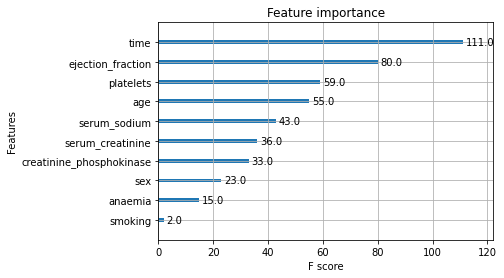

In [37]:
from xgboost import plot_importance
# xgb.feature_importances_
plot_importance(xgb1)
plt.show()

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gdbt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0)
gdbt.fit(X_train, y_train)

pred_gdbt = gdbt.predict(X_test)
evaluating_model(y_test, pred_gdbt)

Accuracy score:-  0.8555555555555555
Precision score:-  0.8571428571428571
Recall score:-  0.6428571428571429
Confusion matrix:- 
 [[59  3]
 [10 18]]


## Chossing the best model

In [42]:
# we will choose XGboost 

import joblib
joblib.dump(xgb1, "model.pkl")
model = joblib.load("model.pkl")
model.predict(X_test)

C:\Users\MACB\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)